<a href="https://colab.research.google.com/github/moises-rb/DS_ONE/blob/main/Estatistica_MachineLearning/6%20-%20Classificacao_Validacao_Modelos_Metricas_Avaliacao/Projeto_Classifica%C3%A7%C3%A3o_Valida%C3%A7%C3%A3o_e_m%C3%A9tricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Classificação: Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Classificando dados</h1>

### Criando um modelo inicial

### Primeira etapa

Leitura da base de dados de diabetes e realize a divisão dos dados em variáveis explicativas e variável alvo (x e y).

In [48]:
import pandas as pd

In [49]:
url = 'https://raw.githubusercontent.com/moises-rb/DS_ONE/refs/heads/main/Estatistica_MachineLearning/6%20-%20Classificacao_Validacao_Modelos_Metricas_Avaliacao/base_dados/emp_automovel.csv'

In [50]:
dados = pd.read_csv(url)
dados

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [51]:
 x = dados.drop('inadimplente', axis=1)
 y = dados['inadimplente']

### Segunda etapa

Realizar a divisão dos dados entre treino e teste.

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size=0.15, random_state=5, stratify=y)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, random_state=5, stratify=y)

### Terceira etapa

Criar 2 modelos utilizando os algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e avaliar a acurácia de treino, validação e teste, escolhendo valores para o parâmetro `max_depth` para os modelos não se especializarem demais no padrão dos dados de treino.

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Algoritmo [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [55]:
arvore = DecisionTreeClassifier()
arvore.fit(x, y)
arvore.score(x, y)

1.0

In [56]:
print(f'Acurácia do modelo: {arvore.score(x, y) * 100:.2f}%')

Acurácia do modelo: 100.00%


In [57]:
arvore = DecisionTreeClassifier()
arvore.fit(x_treino, y_treino)
print(f'Acurácia do treino: {arvore.score(x_treino, y_treino) * 100:.2f}%')
print(f'Acurácia de validação: {arvore.score(x_val, y_val) * 100:.2f}%')

Acurácia do treino: 100.00%
Acurácia de validação: 84.79%


In [58]:
arvore = DecisionTreeClassifier(max_depth=10)
arvore.fit(x_treino, y_treino)
print(f'Acurácia do treino: {arvore.score(x_treino, y_treino) * 100:.2f}%')
print(f'Acurácia de validação: {arvore.score(x_val, y_val) * 100:.2f}%')

Acurácia do treino: 92.06%
Acurácia de validação: 90.57%


Algoritmo [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [59]:
random_forest = RandomForestClassifier(max_depth = 10)
random_forest.fit(x_treino, y_treino)
print(f'Acurácia do treino: {random_forest.score(x_treino, y_treino) * 100:.2f}%')
print(f'Acurácia de validação: {random_forest.score(x_val, y_val) * 100:.2f}%')

Acurácia do treino: 91.55%
Acurácia de validação: 91.29%


In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
previsao_arvore = arvore.predict(x_val)
matriz_confusao = confusion_matrix(y_val, previsao_arvore)
print(matriz_confusao)

[[10357   122]
 [  961    41]]


In [62]:
previsao_random = random_forest.predict(x_val)
matriz_confusao = confusion_matrix(y_val, previsao_random)
print(matriz_confusao)

[[10478     1]
 [  999     3]]


### Quarta etapa

Construir uma matriz de confusão para cada um dos modelos para avaliar o desempenho das previsões.

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay

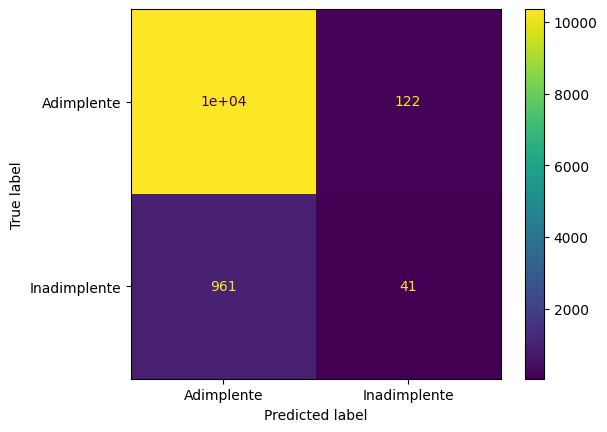

In [64]:
previsao_arvore = arvore.predict(x_val)
matriz_confusao = confusion_matrix(y_val, previsao_arvore)
visualizacao = ConfusionMatrixDisplay(confusion_matrix= matriz_confusao,
                                      display_labels = ['Adimplente', 'Inadimplente'])
visualizacao.plot();

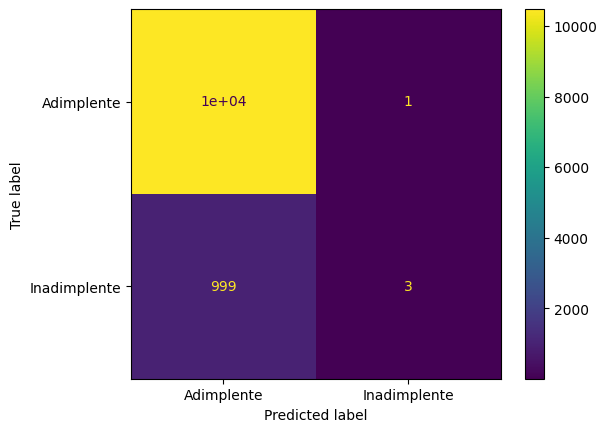

In [65]:
previsao_random = random_forest.predict(x_val)
matriz_confusao = confusion_matrix(y_val, previsao_random)
visualizacao = ConfusionMatrixDisplay(confusion_matrix= matriz_confusao,
                                      display_labels = ['Adimplente', 'Inadimplente'])
visualizacao.plot();

### Quinta etapa

Calculando a Acurácia, Precisão e Recall

In [66]:
from sklearn.metrics import accuracy_score

In [68]:
print(f'Acurácia da validação: {accuracy_score(y_val, previsao_arvore) * 100:.2f}%')

Acurácia da validação: 90.57%


In [69]:
from sklearn.metrics import precision_score, recall_score

In [71]:
print(f'Precisão da validação: {precision_score(y_val, previsao_arvore) * 100:.2f}%')
print(f'Recall da validação: {recall_score(y_val, previsao_arvore) * 100:.2f}%')

Precisão da validação: 25.15%
Recall da validação: 4.09%


In [72]:
from sklearn.metrics import f1_score

In [73]:
print(f'F1 da validação: {f1_score(y_val, previsao_arvore) * 100:.2f}%')

F1 da validação: 7.04%


### Sexta etapa

Construindo a Curva ROC

In [75]:
from sklearn.metrics import RocCurveDisplay

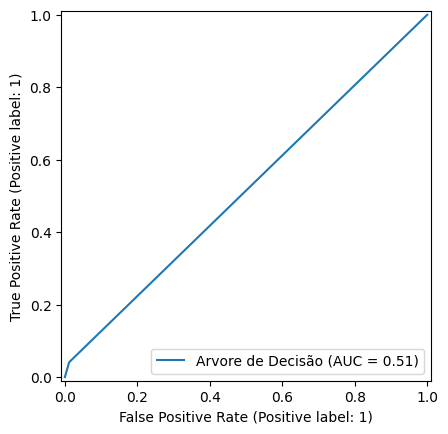

In [76]:
RocCurveDisplay.from_predictions(y_val, previsao_arvore, name='Arvore de Decisão');

In [77]:
from sklearn.metrics import roc_auc_score

In [81]:
print(f'AUC da validação: {roc_auc_score(y_val, previsao_arvore) * 100:.2f}%')

AUC da validação: 51.46%


### Sétima etapa

Construindo a Curva de Precisão x Recall

In [82]:
from sklearn.metrics import PrecisionRecallDisplay

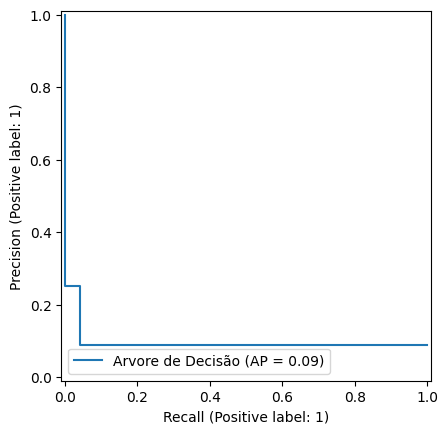

In [83]:
PrecisionRecallDisplay.from_predictions(y_val, previsao_arvore, name='Arvore de Decisão');

In [84]:
from sklearn.metrics import average_precision_score

In [85]:
print(f'AP da Validação: {average_precision_score(y_val, previsao_arvore) * 100:.2f}%')

AP da Validação: 9.40%


### Oitava etapa

Construindo ao Relatório de Métricas

In [86]:
from sklearn.metrics import classification_report

In [87]:
print(f'classification_report: \n{classification_report(y_val, previsao_arvore)}')

classification_report: 
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.25      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.58      0.51      0.51     11481
weighted avg       0.86      0.91      0.87     11481

